In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [6]:
df.shape

(29020, 18)

In [7]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

7661

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

### Data is imbalanced

In [11]:
cat_cols=['type_of_meal_plan', 
       'required_car_parking_space',
       'room_type_reserved',
       'market_segment_type',
       'repeated_guest',
       'booking_status']

num_features=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

DATA ANALYSIS

In [13]:
data=df.copy()

In [14]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


UNIVARIATE ANALYSIS

In [15]:
def num_plot_dist(df, num_features):
    fig, axes=plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

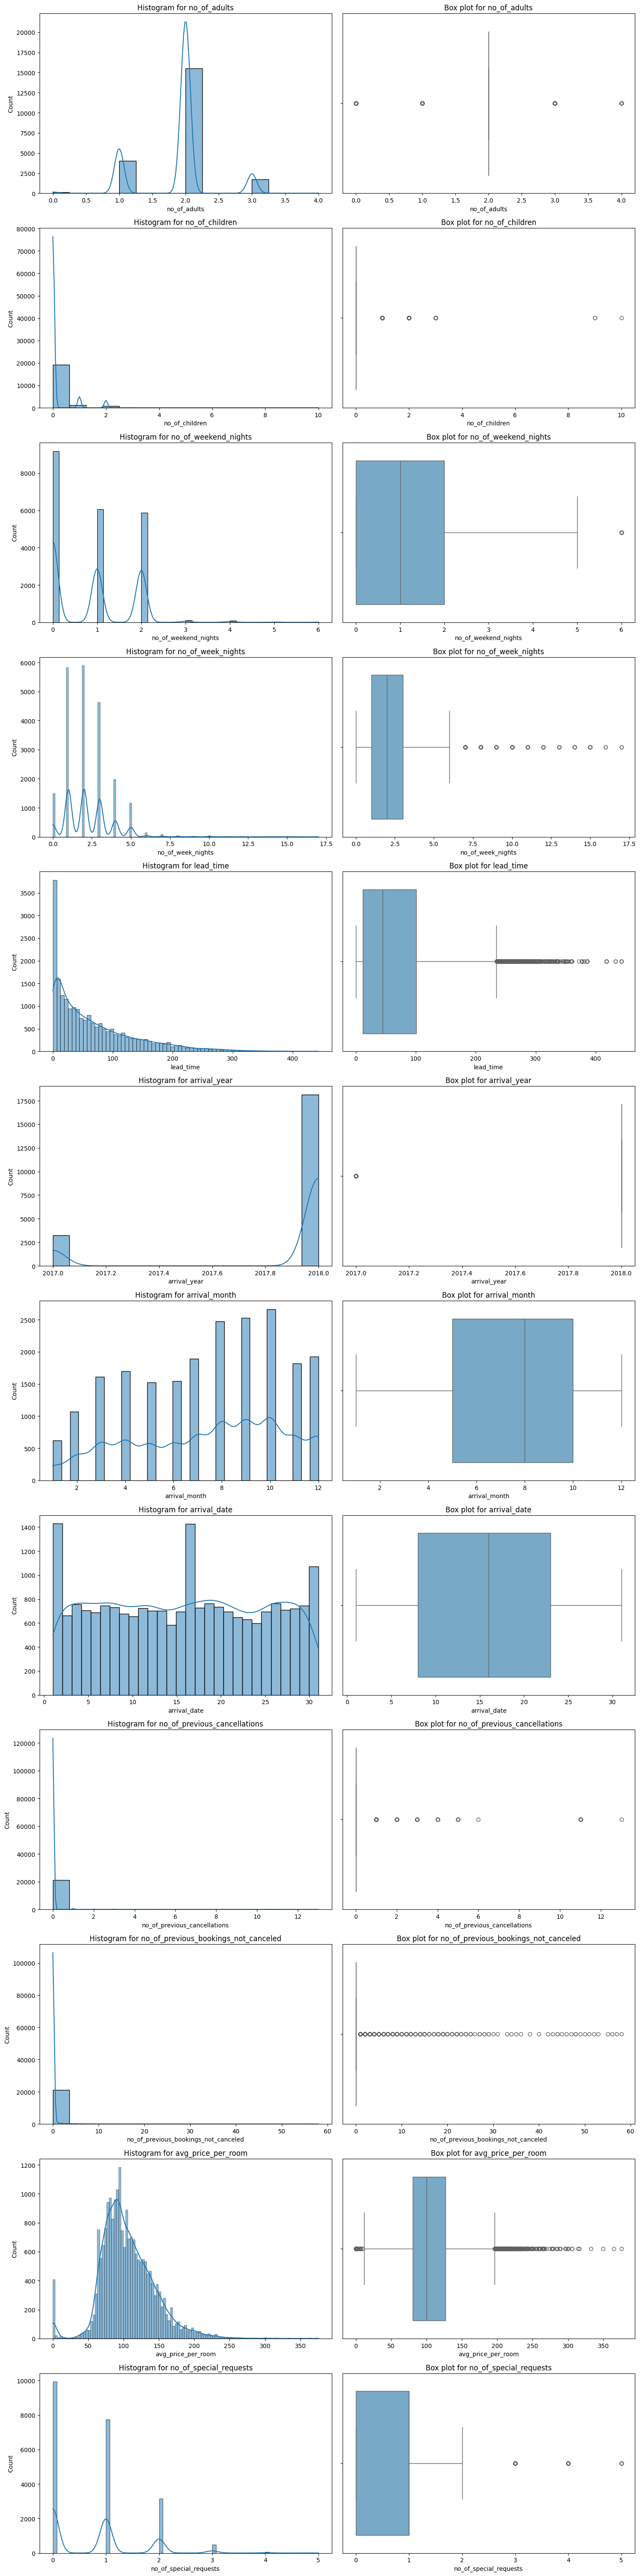

In [16]:
num_plot_dist(data, num_features)

Consider features that are skewed or are normalized

additionally consider outliers for each feature

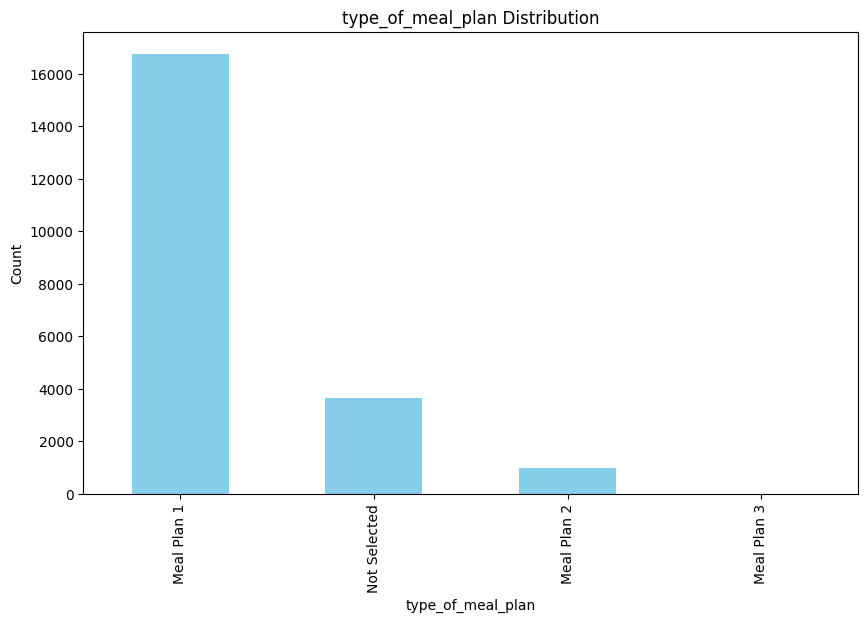

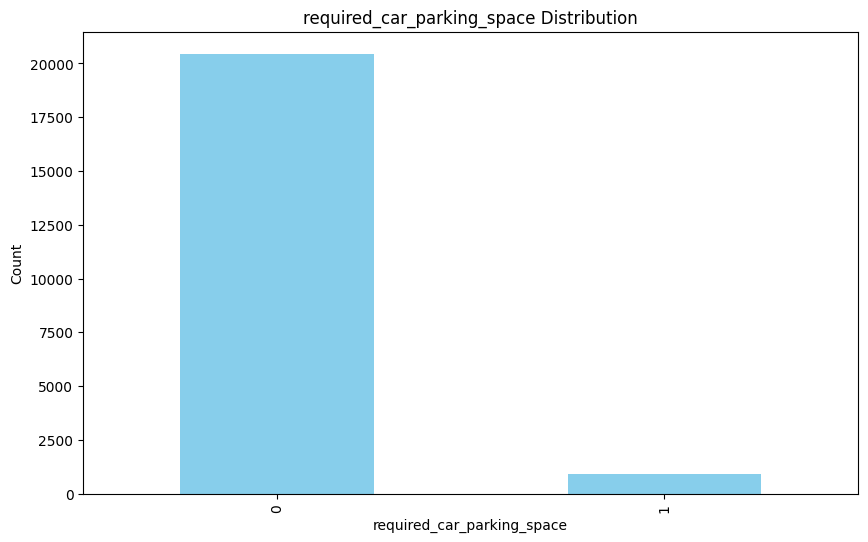

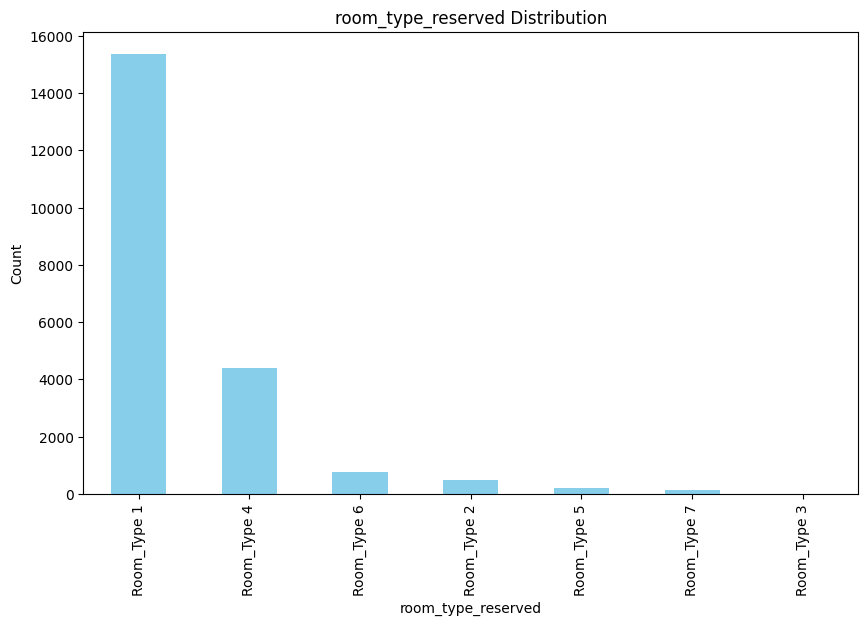

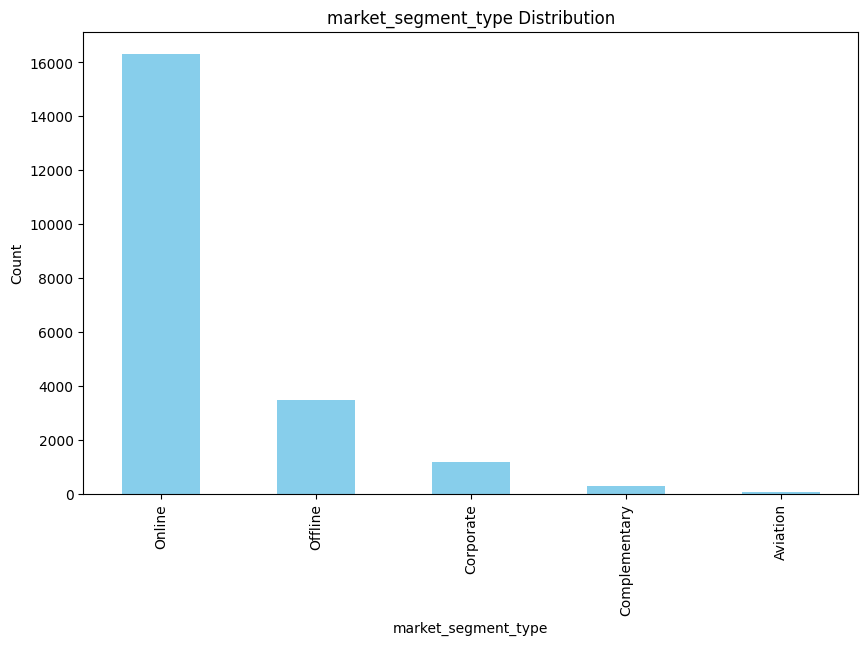

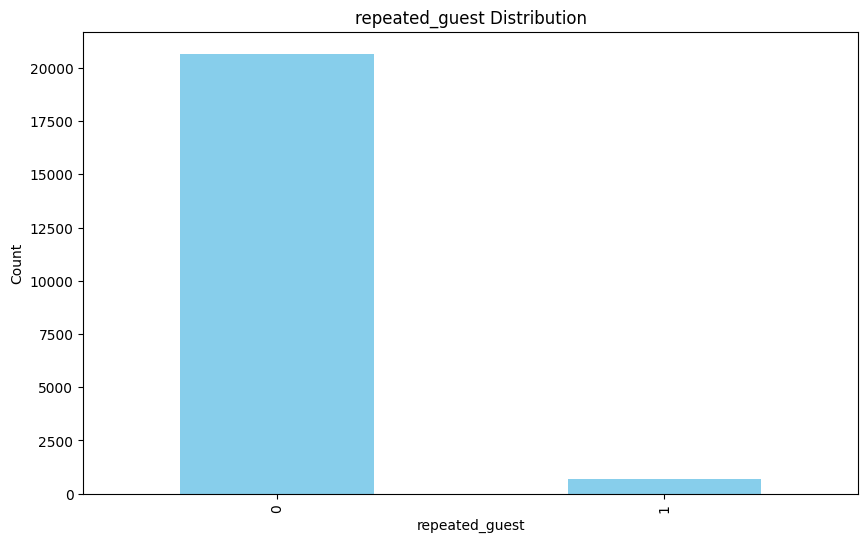

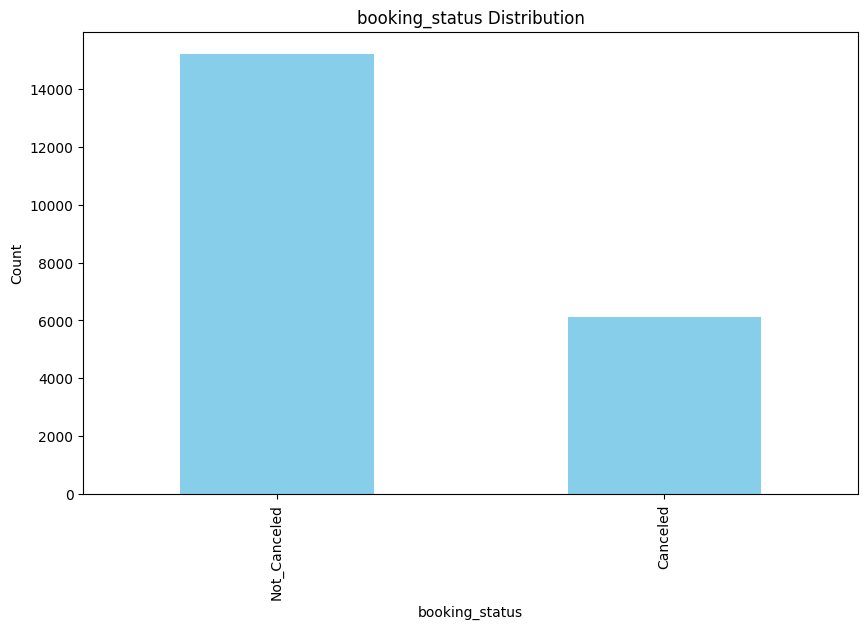

In [17]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivariate analysis

In [18]:
def plot_bivariate_num(df, target, num_features):
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2

    fig, axes=plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes=axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette='Blues')
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

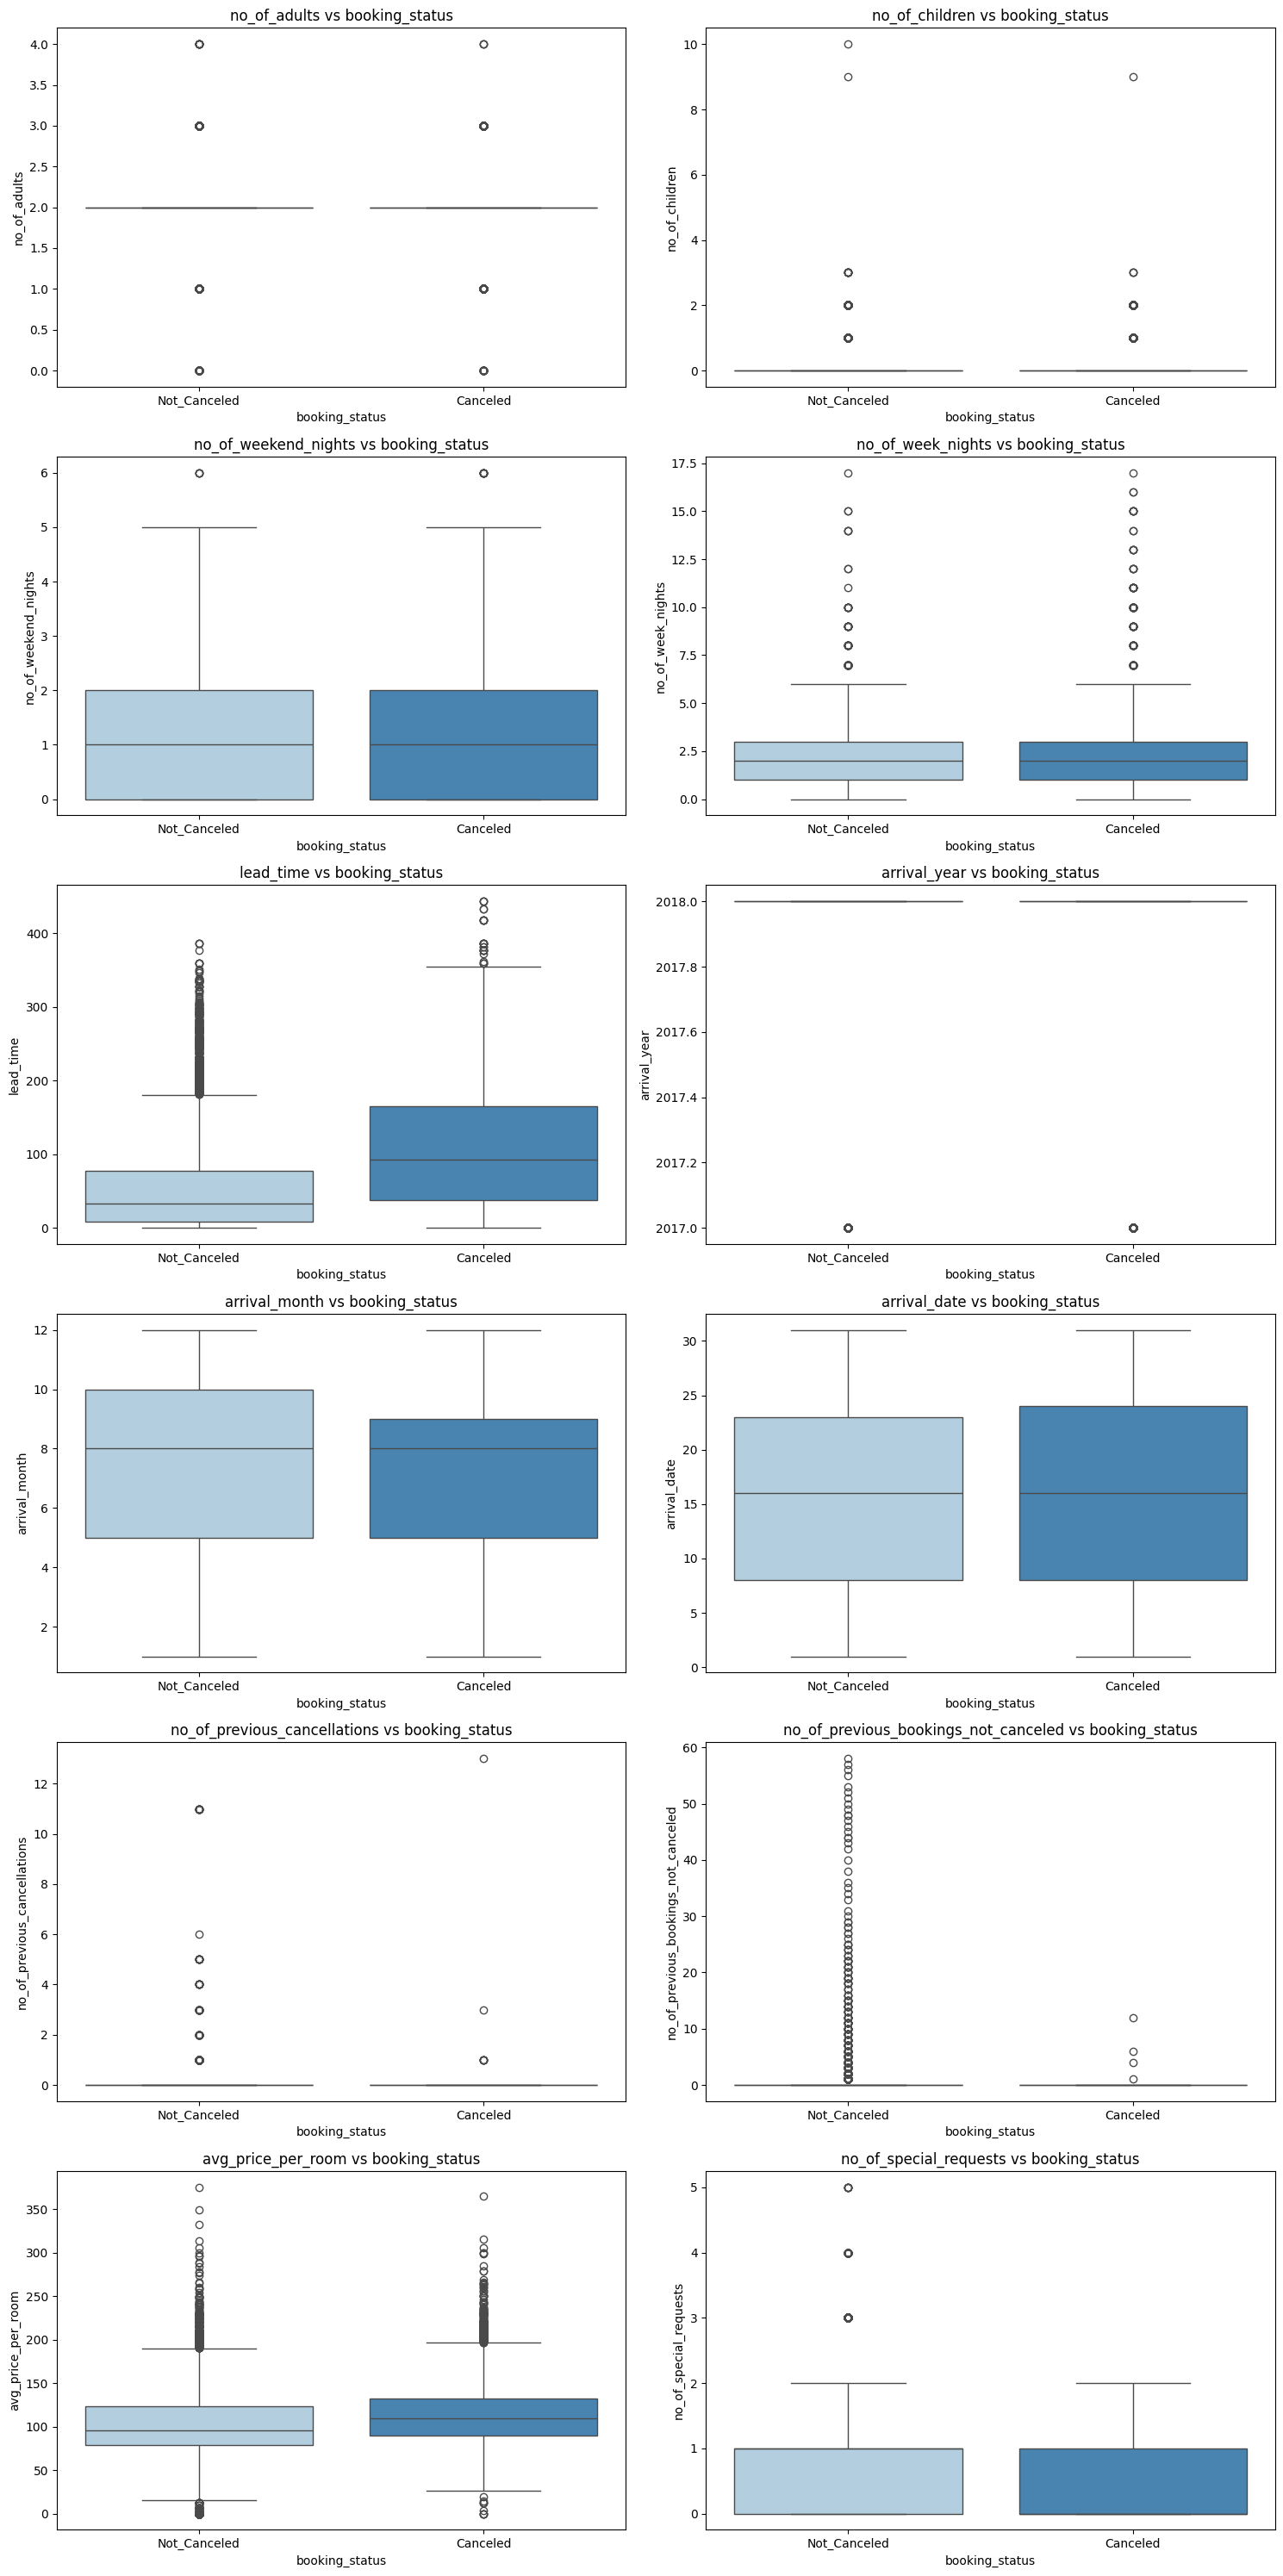

In [19]:
plot_bivariate_num(data, 'booking_status', num_features)

lead time major factor

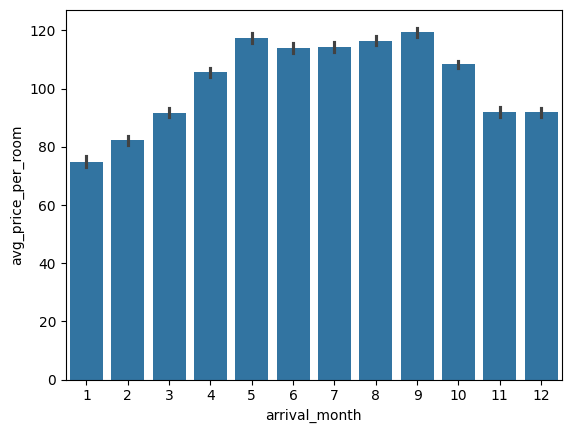

In [20]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [21]:
def plot_bivariate_cat(df, target, cat_feature):
    num_features=len(cat_feature)
    num_rows=(num_features+1)//2
    
    fig, axes=plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes=axes.flatten()

    for i, feature in enumerate(cat_feature):
        sns.countplot(x=feature, hue=target, data=df, ax=axes[i], palette="Set2")
        axes[i].set_title(f"Countplot of {feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

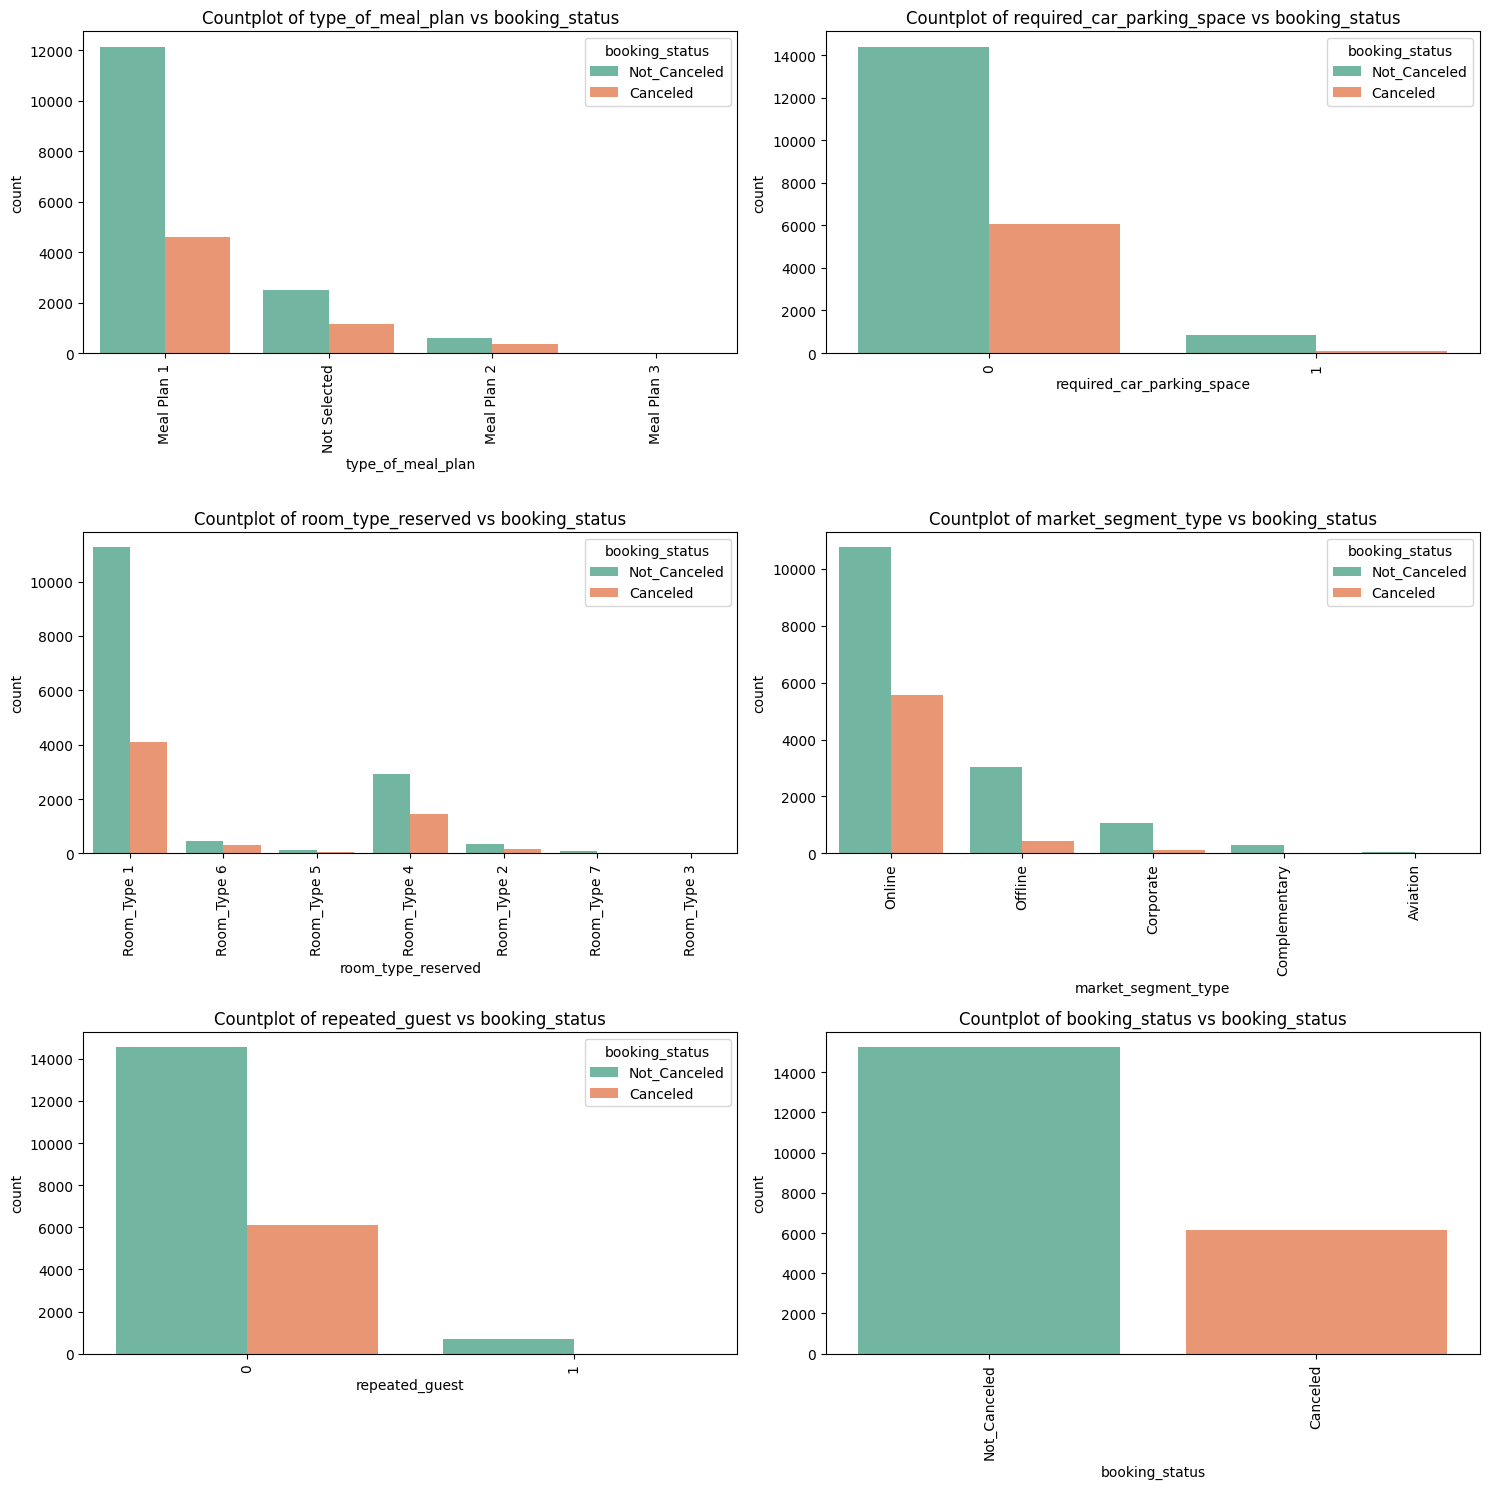

In [22]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [23]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

converting object types to usable types

### label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder=LabelEncoder()

In [28]:
mappings={}

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])

    mappings[col]={label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [29]:
mappings

{'type_of_meal_plan': {0: 0, 1: 1, 2: 2, 3: 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 'market_segment_type': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {0: 0, 1: 1}}

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [32]:
### Multicollinearity test
### basically features that are heavily related

!pip install statsmodels

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [34]:
X=add_constant(df)

vif_data=pd.DataFrame()

vif_data["feature"]=X.columns

vif_data["VIF"]=[variance_inflation_factor(X.values, i)  for i in range(X.shape[1])]

In [35]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


data is free of multicollinearity

In [36]:
corr=df.corr()

<Axes: >

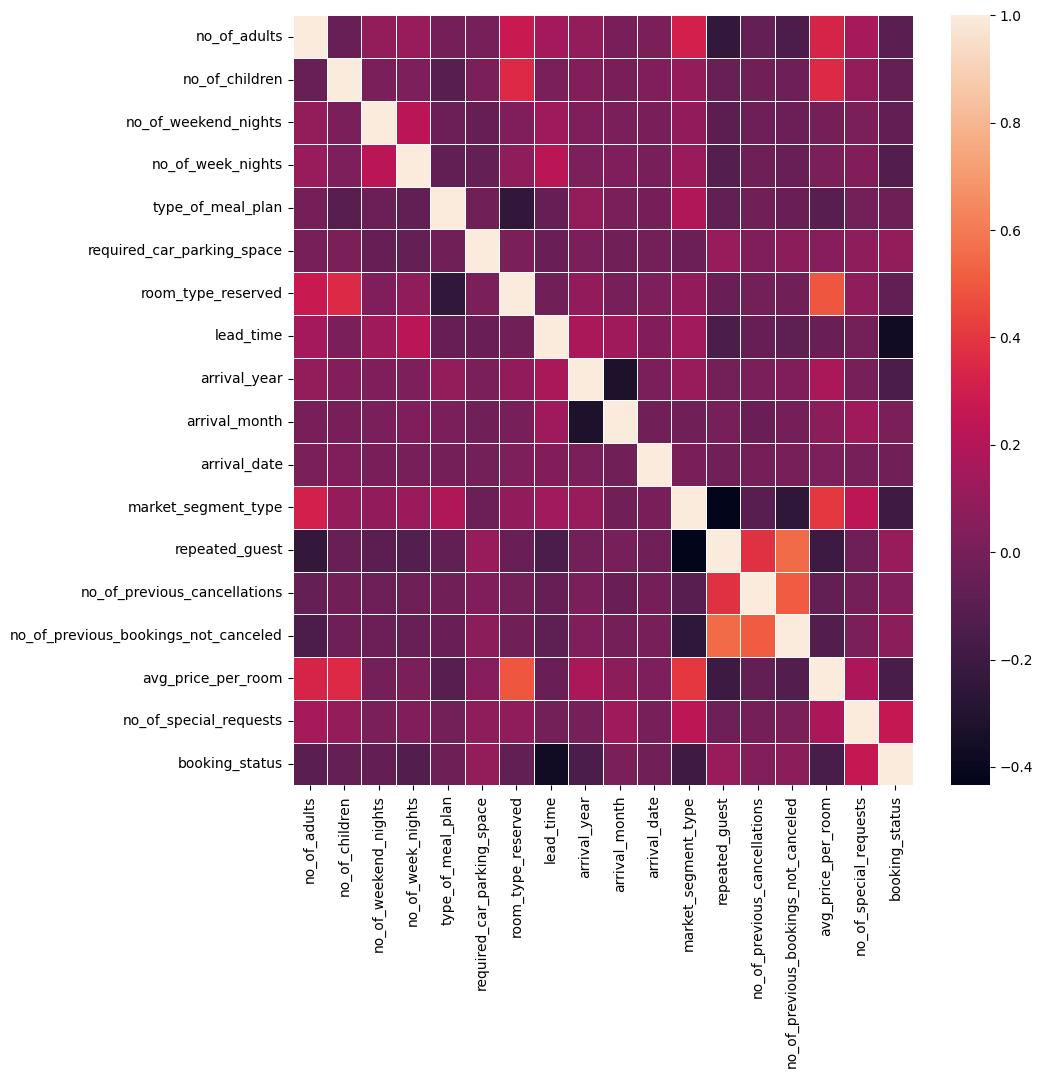

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr,linewidths=0.5)

In [38]:
### checking for skewdness

skewness=df.skew()

In [39]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

applying log transform to handle skew

In [40]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [41]:
#### handling imbalance in data
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

### oversampling instead

In [42]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [43]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

In [44]:
!pip install imbalanced-learn

In [45]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [46]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

from imblearn.over_sampling import SMOTE

In [47]:
smote=SMOTE(random_state=42)

X_res, y_res=smote.fit_resample(X, y)

In [50]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [53]:
balanced_df=pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"]=y_res

In [56]:
balanced_df.shape

(30462, 18)

In [57]:
df=balanced_df.copy()

### Feature selection

In [58]:
len(df.columns)

18

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [61]:
model=RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [62]:
feature_importance=model.feature_importances_

In [66]:
feature_importance_df=pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [69]:
top_features_importance_df=feature_importance_df.sort_values(by="importance", ascending=False)

In [72]:
top_10_features=top_features_importance_df["feature"].head(10).values

top_10_df=df[top_10_features.tolist() + ["booking_status"]]

In [73]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [74]:
df=top_10_df.copy()

Model selection

In [75]:
!pip install xgboost lightgbm

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 2/2 [lightgbm]



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [77]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
classifiers={
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support vector classifier": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGboost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [83]:
metrics={
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 score": [],
}

In [84]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred=classifier.predict(X_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)


In [85]:
metrics_df=pd.DataFrame(metrics)

In [86]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.890202,0.890915,0.891205,0.891060
1,Logistic Regression,0.776137,0.805516,0.732573,0.767315
2,Support vector classifier,0.720499,0.729902,0.706840,0.718186
3,Gradient Boosting,0.836534,0.820854,0.864169,0.841955
4,K-Nearest Neighbors,0.778763,0.855491,0.674919,0.754552
5,Decision Tree,0.834728,0.846025,0.821498,0.833581
6,Naive Bayes,0.773182,0.803379,0.728013,0.763841
7,XGboost,0.871820,0.866006,0.882085,0.873971
8,Adaboost,0.821434,0.813211,0.838111,0.825473
9,LGBM,0.865912,0.852141,0.887948,0.869676


#### Random forest with best performance

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [88]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
rf=RandomForestClassifier(random_state=42)

In [91]:
params_dist={
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False],
}

In [92]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [93]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.7s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000195014F2D70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000195014F0AC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000195014F3100>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000195014F3D00>},
                   random_state=42, scoring='accuracy', verbose=2)

In [94]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 34,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 158}

In [95]:
best_rf_model=random_search.best_estimator_

In [96]:
y_pred=best_rf_model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

before finetuning scores

0.890202	0.890915	0.891205	0.891060

In [98]:
print(accuracy, precision, recall, f1)

0.8944690628590185 0.8941214680090939 0.896742671009772 0.8954301512441047


In [99]:
### save this model
import joblib

In [100]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [101]:
loaded_model=joblib.load("random_forest.pkl")

In [102]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [104]:
new_data=np.array([190,	1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1,-1)

In [105]:
predictions=loaded_model.predict(new_data)

In [106]:
predictions

array([1], dtype=int64)